# Data Homework: Chapter 10

Name:<u> Enter your full name here

Directions: Download the following data from [FRED](https://fred.stlouisfed.org/graph/?g=qJmt) using pandas_datareader.
    
>Civilian Labor Force Level: CLF16OV
>
>All Employees: CE16OV
>
>All Employees (Nonfarm): PAYEMS 
>
>Unemployment Rate: UNRATE
>
>Labor Force Participation Rate: CIVPART
>
>CPI - Total All Items for the United States: CPIAUCSL

1.	Plot the unemployment rate alongside the Labor Force Participation Rate.

In [1]:
import datetime
from datlib.FRED import *
from datlib.plots import *
#Import monetary base
# {data_name1:data_code1,
#  data_name2:data_code2}
data_codes  = {"Unemployment Rate": "UNRATE",
    "Civilian Labor Force Level": "CLF16OV",
    "All Employees": "CE16OV",
    "All Employees (Nonfarm)": "PAYEMS",
    "Labor Force Participation Rate": "CIVPART",
    "CPI - Total All Items for the United States": "CPIAUCSL",
              }
# Select start and end dates
start = datetime.datetime(1975, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, 
                   start = start, 
                   end = end, 
                   freq = "M")
data

,Unemployment Rate,Civilian Labor Force Level,All Employees,All Employees (Nonfarm),Labor Force Participation Rate,CPI - Total All Items for the United States
DATE,,,,,,
1975-01-31,8.1,93128.0,85627.0,77293.0,61.4,52.300
1975-02-28,8.1,92776.0,85256.0,76918.0,61.0,52.600
1975-03-31,8.6,93165.0,85187.0,76648.0,61.2,52.800
1975-04-30,8.8,93399.0,85189.0,76460.0,61.3,53.000
1975-05-31,9.0,93884.0,85451.0,76624.0,61.5,53.100
...,...,...,...,...,...,...
2023-03-31,3.5,166731.0,160892.0,155472.0,62.6,301.808
2023-04-30,3.4,166688.0,161031.0,155689.0,62.6,302.918
2023-05-31,3.7,166818.0,160721.0,155970.0,62.6,303.294


In [2]:
data.to_csv("Ch10HWData.csv")

C:\Users\JLCat\GithubRepositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


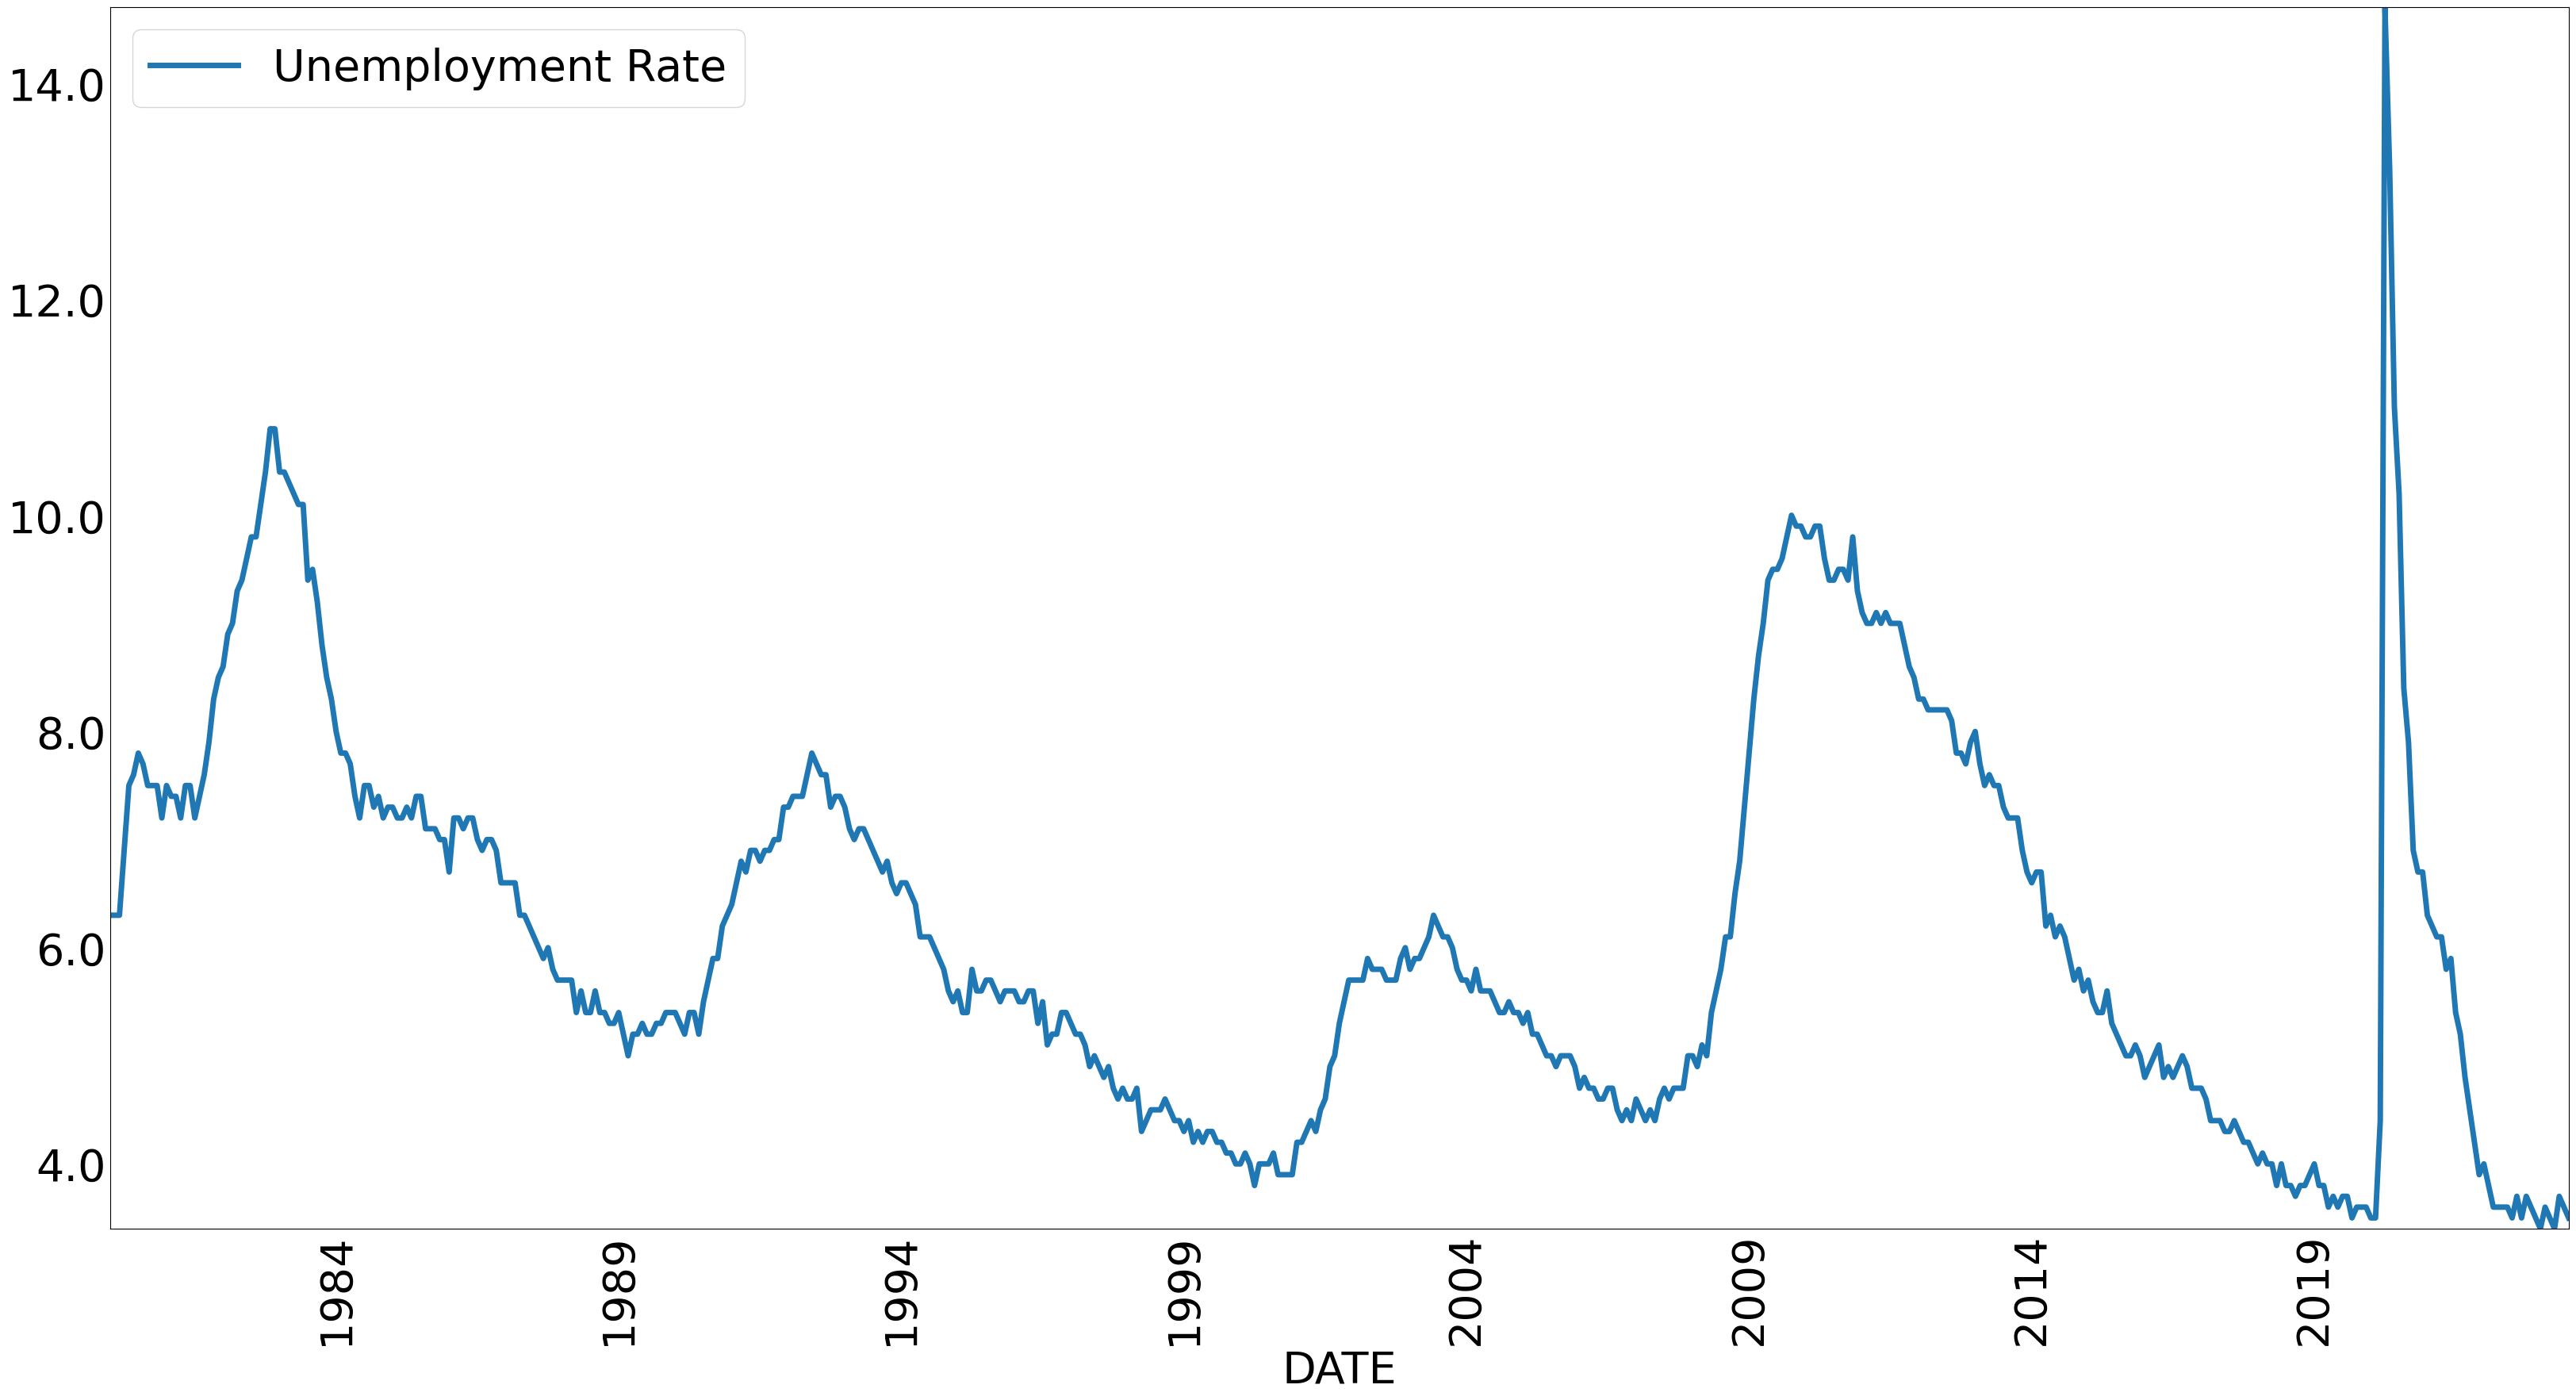

In [3]:
plt.rcParams.update({'font.size': 40})
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
plot_lines(data["Unemployment Rate"].loc["1980":], linewidth = 5)

Now I'm going to write about this plot

# and then the next plot

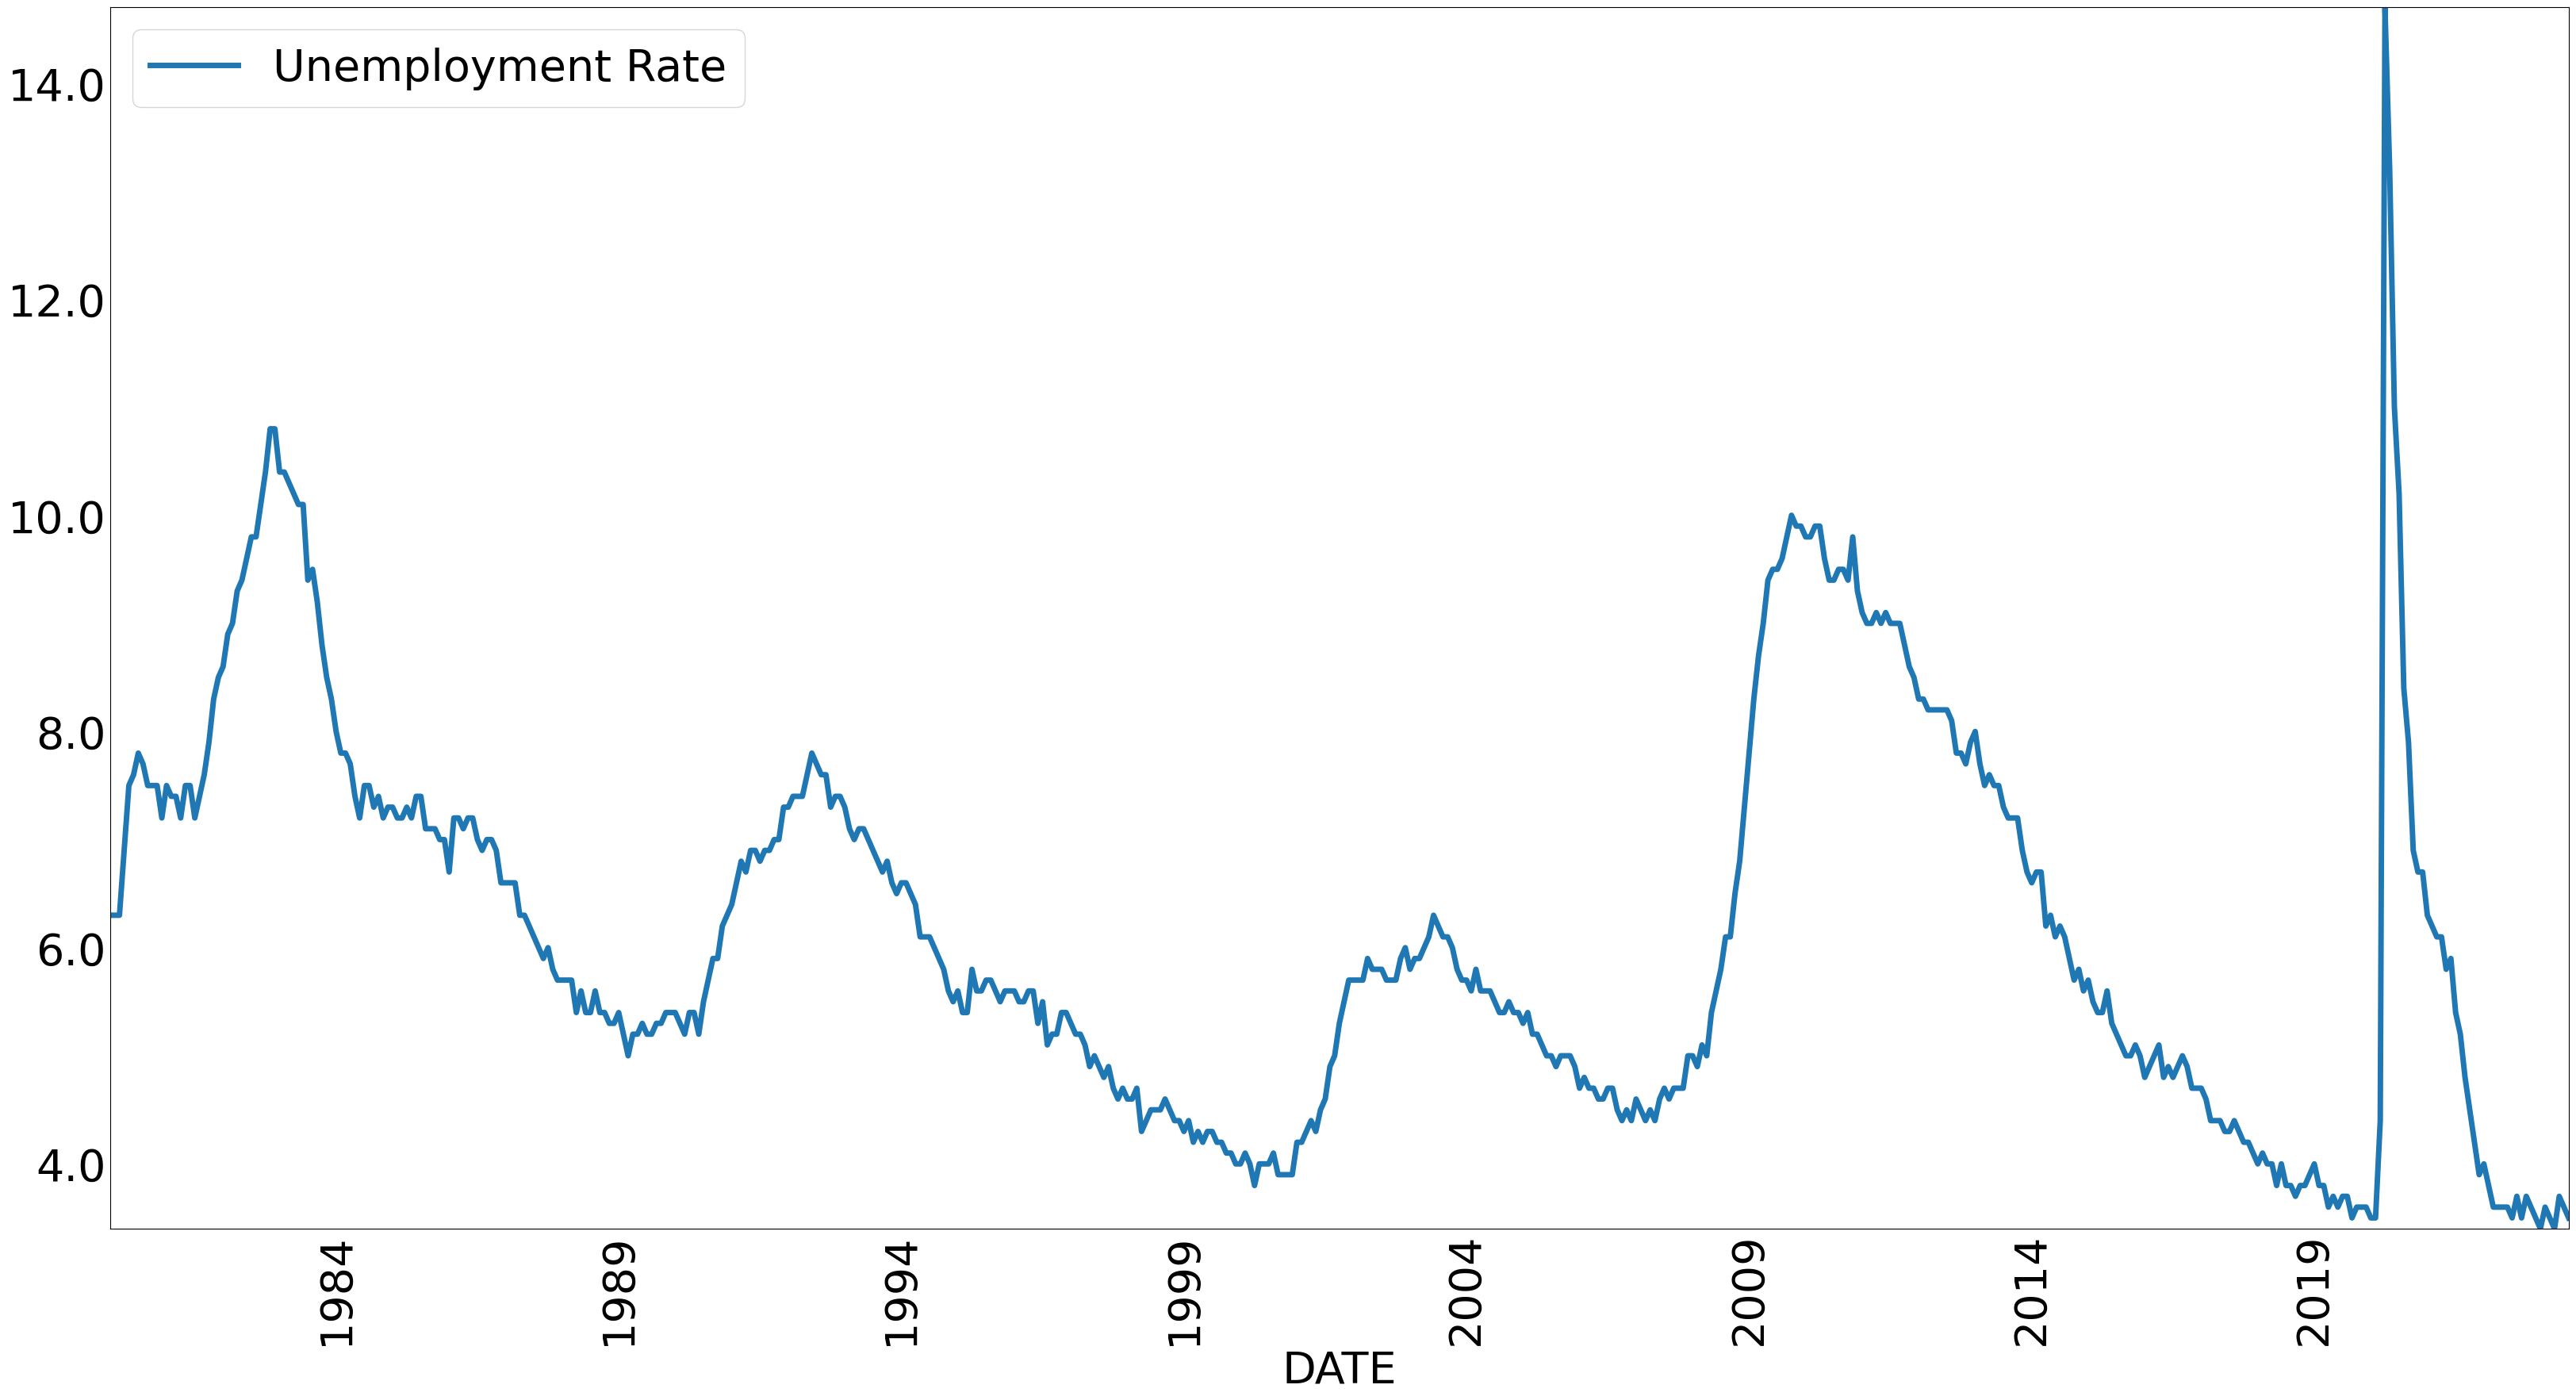

In [4]:
plot_lines(data["Unemployment Rate"].loc["1980":], linewidth = 5)

C:\Users\JLCat\GithubRepositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


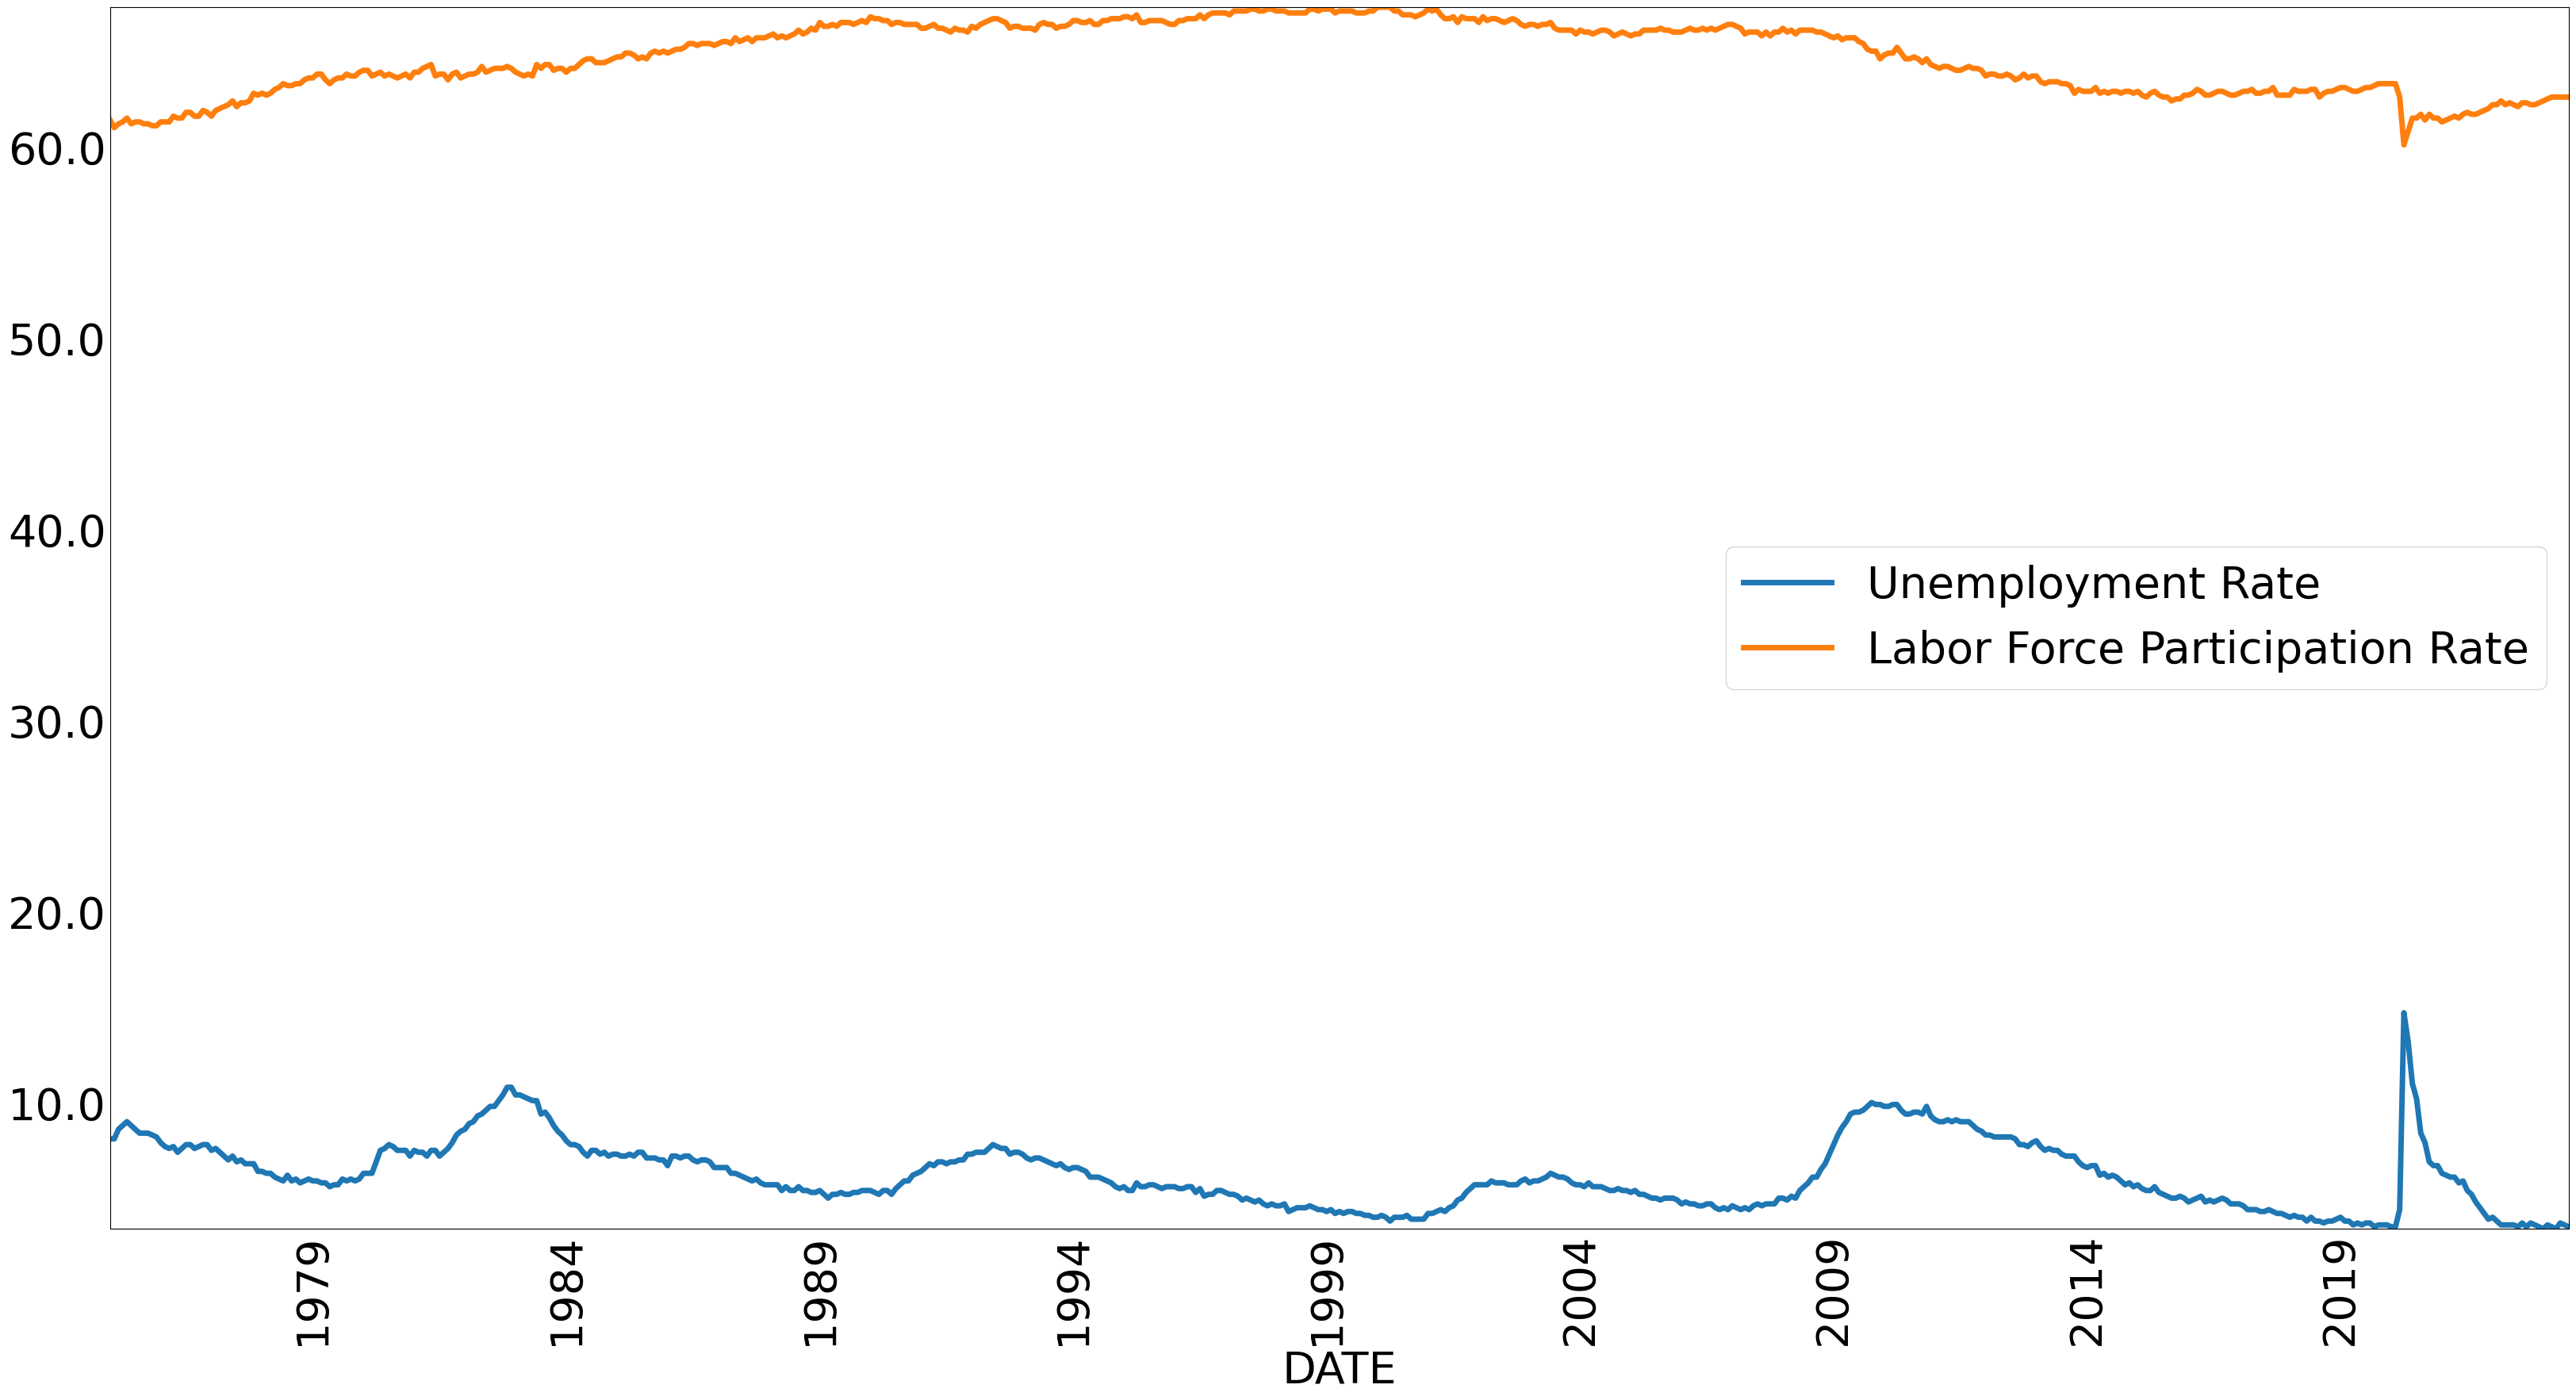

In [5]:

plot_lines(data[["Unemployment Rate", "Labor Force Participation Rate"]], linewidth = 5)

C:\Users\JLCat\GithubRepositories\Macroeconomics-Growth-and-Monetary-Equilibrium\Data Homework Assignments\datlib\plots.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(x,2) for x in vals])


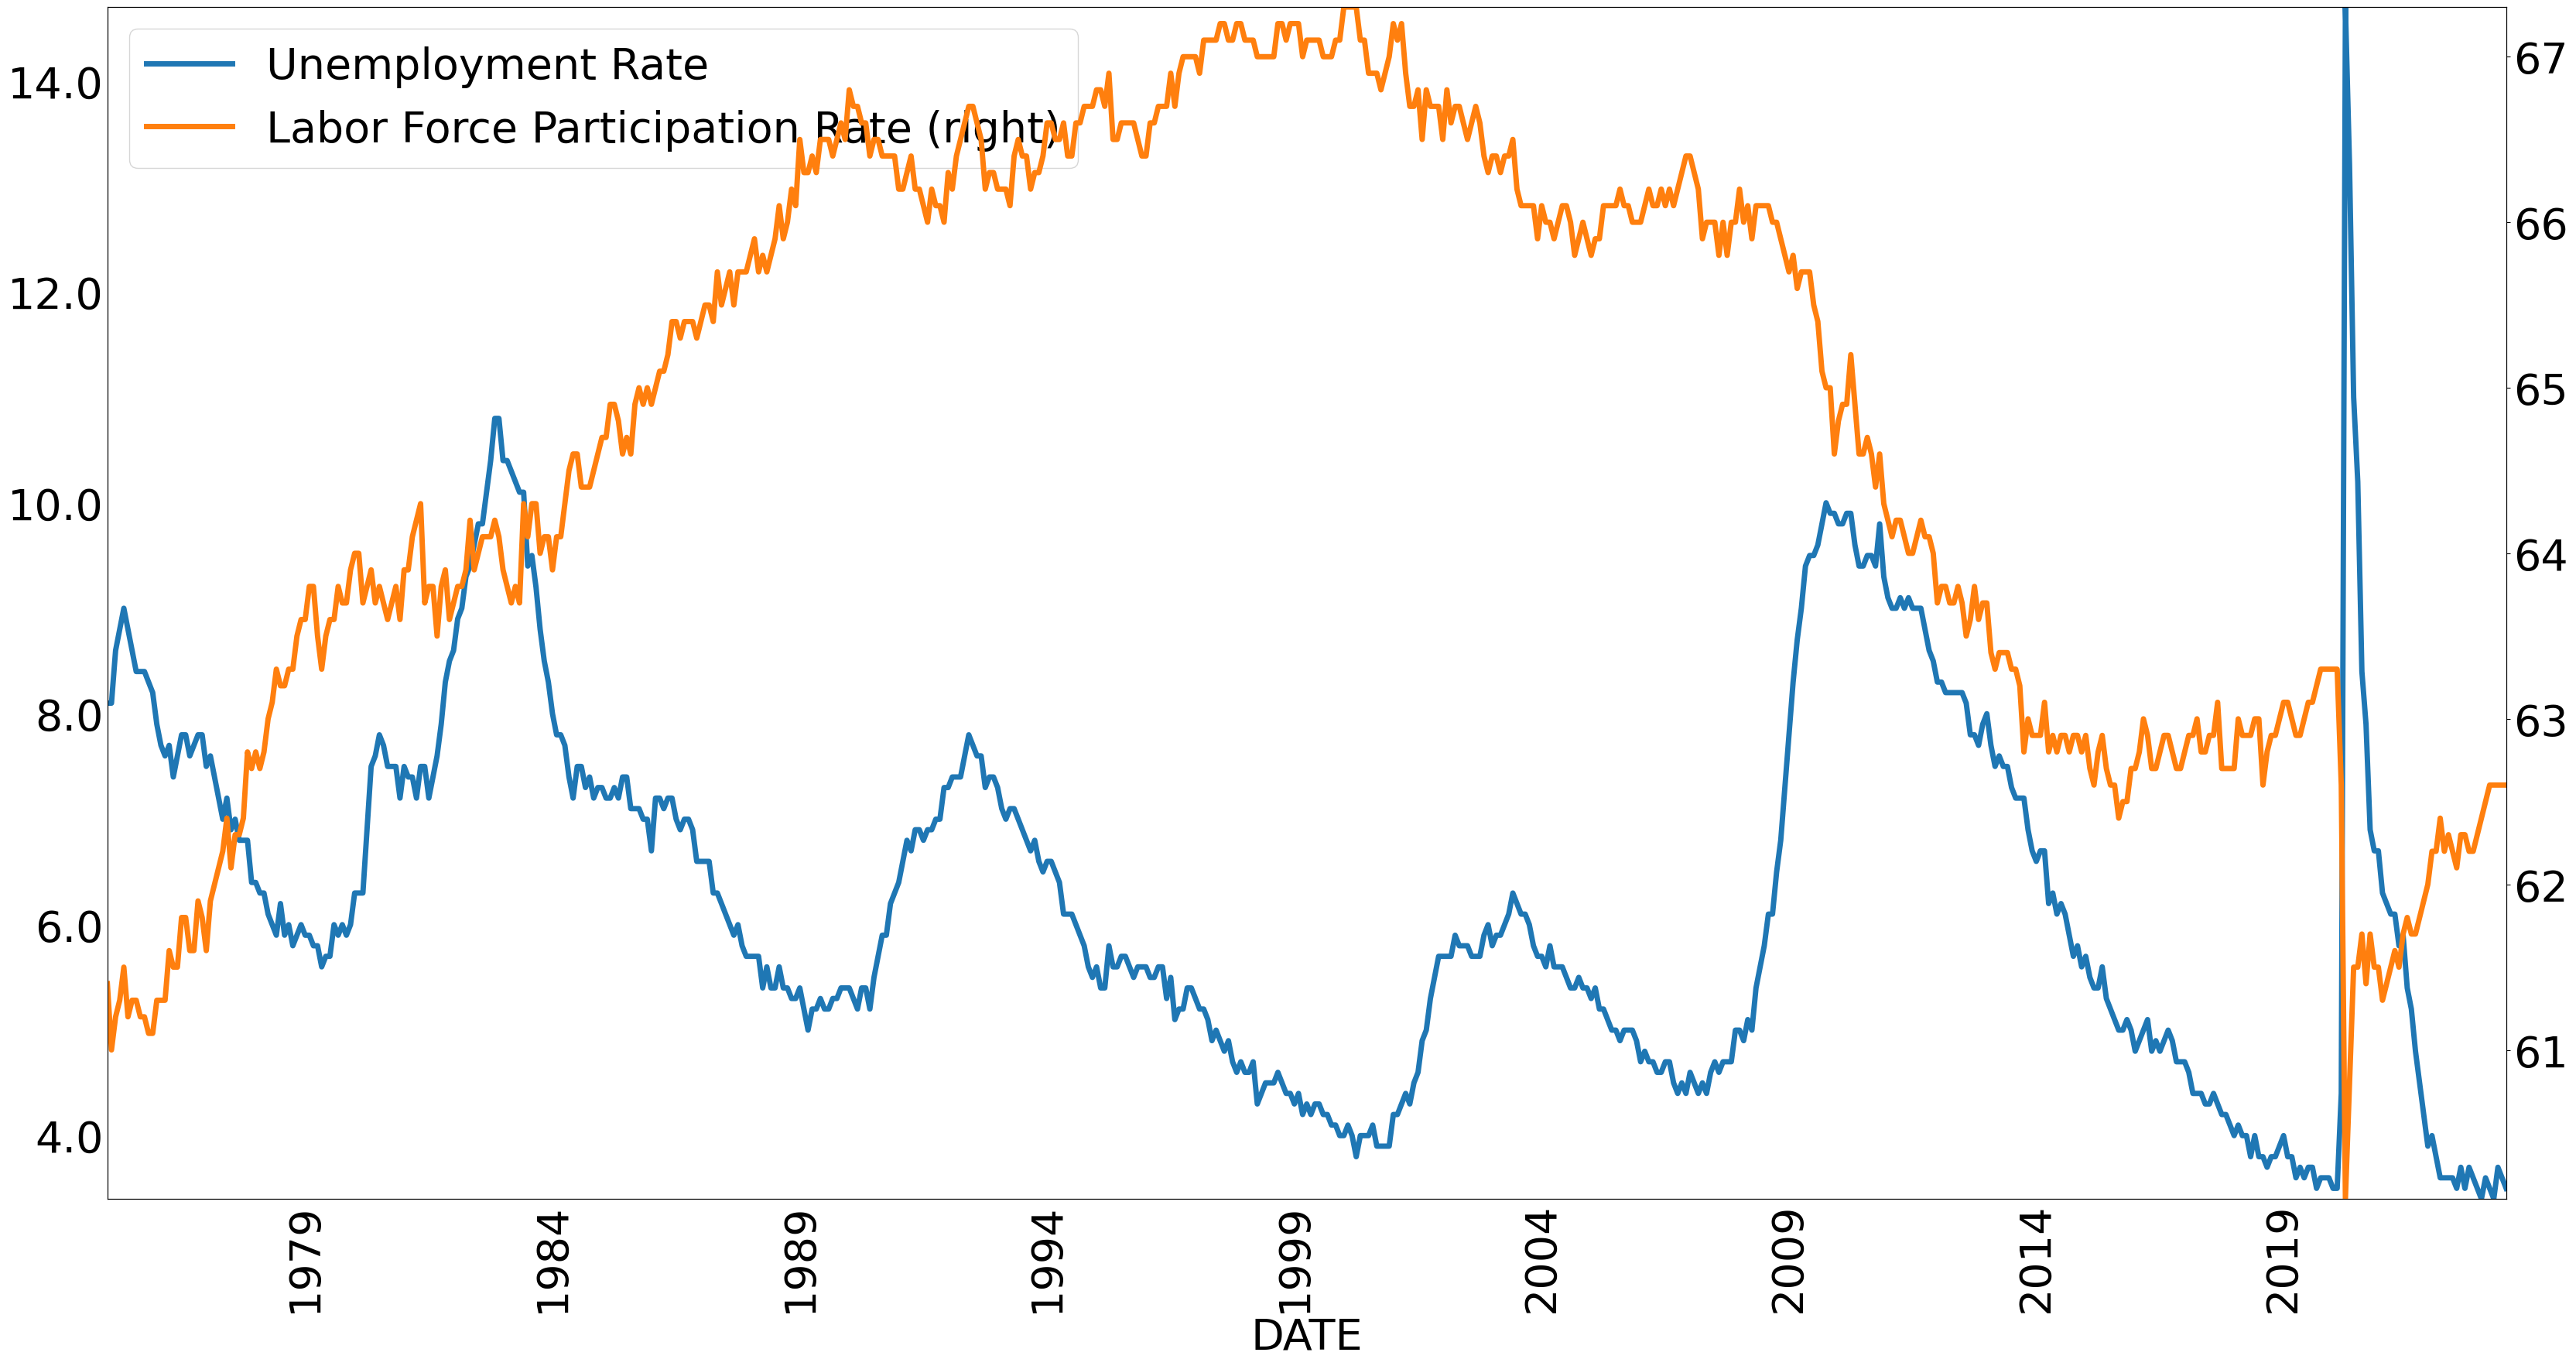

In [6]:
plot_lines(data[["Unemployment Rate", "Labor Force Participation Rate"]], 
           linewidth = 5,
           secondary_y = "Labor Force Participation Rate")

2.	Calculate the employment rate using Civilian Labor Force Level and All Employees (CE16OV).

In [7]:
# e = E / L
E = data["All Employees"]
L = data["Civilian Labor Force Level"]

e = E / L
data["Employment Rate"] = e * 100
data["Employment Rate"]

DATE
1975-01-31    91.945494
1975-02-28    91.894455
1975-03-31    91.436698
1975-04-30    91.209756
1975-05-31    91.017639
                ...    
2023-03-31    96.497952
2023-04-30    96.606234
2023-05-31    96.345119
2023-06-30    96.431887
2023-07-31    96.504551
Freq: M, Name: Employment Rate, Length: 583, dtype: float64

3.	Calculate the rate of unemployment using the employment rate data that you calculated in (1). Make sure the data matches the unemployment rate (UNRATE) that was initially downloaded.

In [8]:
# u = 1 - e (Multiply this by 100)

4.	Graph the unemployment rate you calculated alongside the unemployment rate that you downloaded from FRED.

5.	Calculate the fraction of labor that works in farming. Plot the newly created data. (Hint: You will have to calculate non-farm labor as a percentage of labor first) 

In [9]:
#1. Calculate Farm Labor

data["All Employees (Farm)"] = data["All Employees"].sub(data["All Employees (Nonfarm)"])
data

,Unemployment Rate,Civilian Labor Force Level,All Employees,All Employees (Nonfarm),Labor Force Participation Rate,CPI - Total All Items for the United States,Employment Rate,All Employees (Farm)
DATE,,,,,,,,
1975-01-31,8.1,93128.0,85627.0,77293.0,61.4,52.300,91.945494,8334.0
1975-02-28,8.1,92776.0,85256.0,76918.0,61.0,52.600,91.894455,8338.0
1975-03-31,8.6,93165.0,85187.0,76648.0,61.2,52.800,91.436698,8539.0
1975-04-30,8.8,93399.0,85189.0,76460.0,61.3,53.000,91.209756,8729.0
1975-05-31,9.0,93884.0,85451.0,76624.0,61.5,53.100,91.017639,8827.0
...,...,...,...,...,...,...,...,...
2023-03-31,3.5,166731.0,160892.0,155472.0,62.6,301.808,96.497952,5420.0
2023-04-30,3.4,166688.0,161031.0,155689.0,62.6,302.918,96.606234,5342.0
2023-05-31,3.7,166818.0,160721.0,155970.0,62.6,303.294,96.345119,4751.0


6. Calculate the year-over-year rate of inflation using CPI data. Plot the inflation rate against the unemployment rate.

7. Is there a consistent relationship between unemployement and inflation? Explain your reasoing using macroeconomic theory.

8.	Go to the BLS website: https://www.bls.gov/cps/definitions.htm#nilf. Explain why some persons might not be considered as part of the labor force even if they would like to have a job. How do you think this effects the estimate of the unemployment rate